In [2]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.6-cp313-cp313-win_amd64.whl.metadata (169 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the datasets
customers = pd.read_csv(r"C:\Users\Harpitha\Downloads\ECommerce\Customers.csv")
products = pd.read_csv(r"C:\Users\Harpitha\Downloads\ECommerce\Products.csv")
transactions = pd.read_csv(r"C:\Users\Harpitha\Downloads\ECommerce\Transactions.csv")

In [5]:
# Display basic information about the datasets
print(customers.info())
print(products.info())
print(transactions.info())
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())
# Basic statistics for numerical columns
print(customers.describe())
print(products.describe())
print(transactions.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

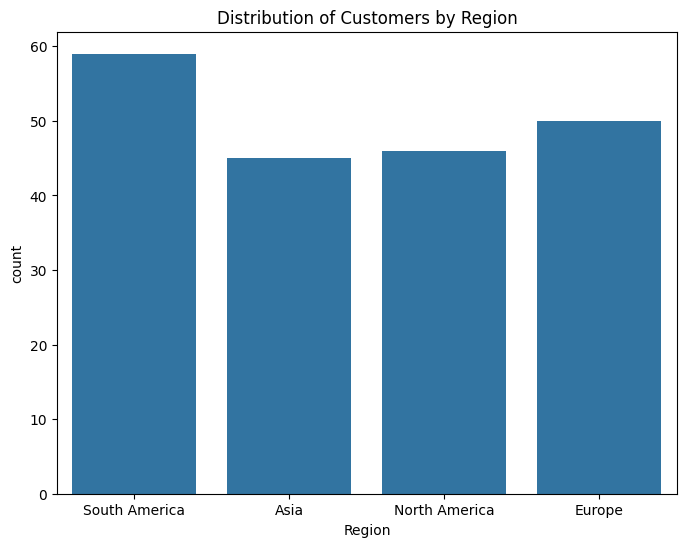

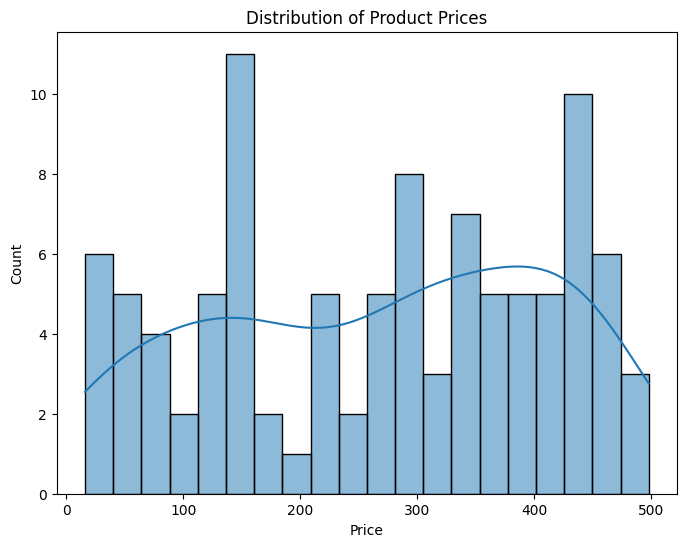

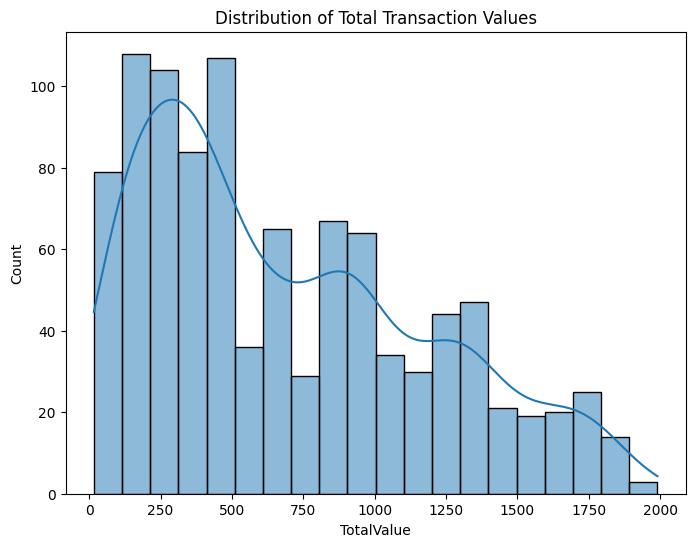

In [6]:
# EDA Visualizations

# 1. Distribution of customers by region
plt.figure(figsize=(8,6))
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.show()

# 2. Product price distribution
plt.figure(figsize=(8,6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.show()

# 3. Total transaction value distribution
plt.figure(figsize=(8,6))
sns.histplot(transactions['TotalValue'], bins=20, kde=True)
plt.title('Distribution of Total Transaction Values')
plt.show()

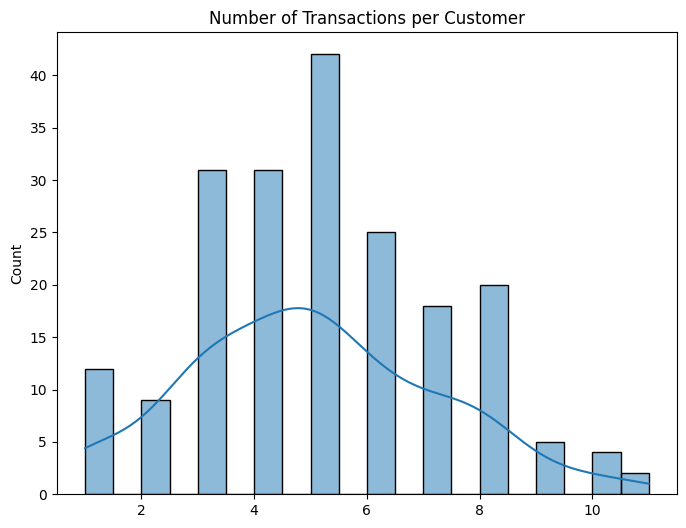

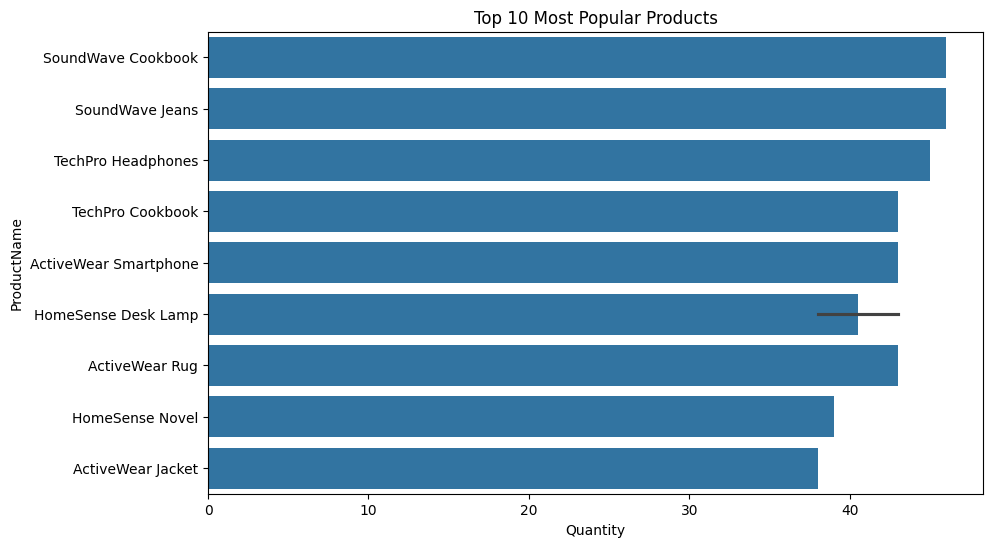

In [7]:
# 4. Number of transactions per customer
customer_transactions = transactions.groupby('CustomerID').size()
plt.figure(figsize=(8,6))
sns.histplot(customer_transactions, bins=20, kde=True)
plt.title('Number of Transactions per Customer')
plt.show()

# 5. Most popular products (based on quantity sold)
popular_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
popular_products = popular_products.merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')
popular_products = popular_products.sort_values('Quantity', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Quantity', y='ProductName', data=popular_products.head(10))
plt.title('Top 10 Most Popular Products')
plt.show()

# Business Insights
# You can derive insights based on the EDA above, like:
# 1. "Most customers are from Region X, which can be targeted for future campaigns."
# 2. "Product Y has the highest sales volume, indicating a strong market demand."
# 3. "The average transaction value is increasing over time, suggesting growing customer spending."
# 4. "Customers with higher transaction frequency tend to buy from the same product category."
# 5. "A significant number of customers have low purchase frequency, which might indicate churn risk."

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Merging customer and transaction data
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Create a feature set (e.g., total spend per customer, average transaction value)
customer_features = merged_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean'),
    transaction_count=('TransactionID', 'count')
).reset_index()

In [12]:
# Normalize the features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['total_spend', 'avg_transaction_value', 'transaction_count']])

# Calculate similarity (cosine similarity)
similarity_matrix = cosine_similarity(customer_features_scaled)

# Create a function to get top 3 lookalike customers for a given customer
def get_lookalikes(customer_id, top_n=3):
    customer_idx = customer_features[customer_features['CustomerID'] == customer_id].index[0]
    similarities = similarity_matrix[customer_idx]
    similar_customers = list(enumerate(similarities))
    similar_customers = sorted(similar_customers, key=lambda x: x[1], reverse=True)
    similar_customers = [(customer_features.iloc[i[0]]['CustomerID'], i[1]) for i in similar_customers[1:top_n+1]]
    return similar_customers

# Generate Lookalike.csv for the first 20 customers
lookalike_data = []
for customer_id in customer_features['CustomerID'][:20]:
    lookalikes = get_lookalikes(customer_id)
    for lookalike in lookalikes:
        lookalike_data.append([customer_id, lookalike[0], lookalike[1]])

# Save the lookalikes to a CSV
lookalike_df = pd.DataFrame(lookalike_data, columns=['CustomerID', 'Lookalike_CustomerID', 'Similarity_Score'])
lookalike_df.to_csv('Lookalike.csv', index=False)

# Display the top 3 lookalikes for the first customer
print(get_lookalikes('C0001'))


[('C0137', np.float64(0.9993600788417097)), ('C0152', np.float64(0.9956575062125336)), ('C0121', np.float64(0.993012333505939))]


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Combining customer profile and transaction data
transaction_data = transactions.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count')
).reset_index()

customer_data = customers[['CustomerID', 'Region']]
customer_data = customer_data.merge(transaction_data, on='CustomerID', how='left')

In [16]:
# Check for missing values
print(customer_data.isnull().sum())

# Option 1: Fill NaN values with 0 (or you can use mean/median if more appropriate)
customer_data.fillna(0, inplace=True)

# Option 2: Alternatively, you can drop rows with NaN values
# customer_data.dropna(inplace=True)

# Normalize the features again after handling missing values
customer_data_scaled = scaler.fit_transform(customer_data[['total_spend', 'transaction_count'] + [col for col in customer_data.columns if 'Region' in col]])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

CustomerID              0
total_spend             1
transaction_count       1
Region_Europe           0
Region_North America    0
Region_South America    0
dtype: int64
Davies-Bouldin Index: 1.0278862229269996


In [18]:
# Check the column names to ensure 'Region' is present
print(customer_data.columns)

# Convert categorical data (Region) to numeric using one-hot encoding
if 'Region' in customer_data.columns:
    customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)
else:
    print("Column 'Region' not found in the DataFrame")


Index(['CustomerID', 'total_spend', 'transaction_count', 'Region_Europe',
       'Region_North America', 'Region_South America', 'Cluster'],
      dtype='object')
Column 'Region' not found in the DataFrame


In [19]:
# Normalize the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_spend', 'transaction_count'] + [col for col in customer_data.columns if 'Region' in col]])

# Perform KMeans clustering (choose 4 clusters as an example)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 1.0278862229269996


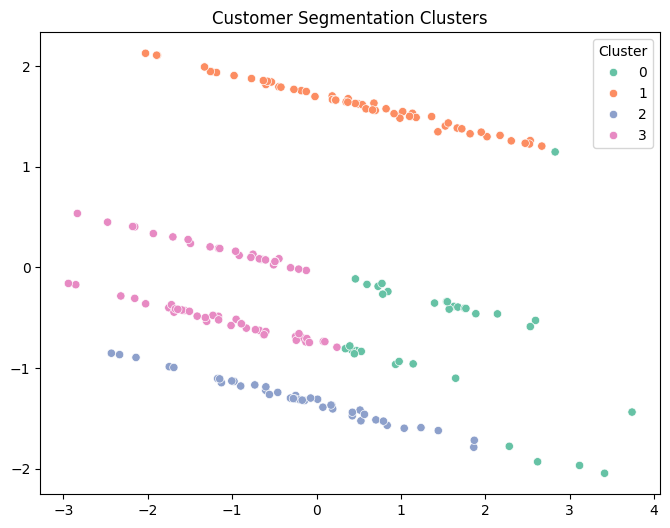

In [20]:
# Visualize the clusters (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_data_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=customer_data['Cluster'], palette='Set2')
plt.title('Customer Segmentation Clusters')
plt.show()

In [21]:

# Save clustering results to a CSV
customer_data[['CustomerID', 'Cluster']].to_csv('Clustering_Results.csv', index=False)